## Stat Project Plotting for #4

In [1]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

### 分群：高高、高低、低高、低低

In [2]:
# read dataset of midterm scores
df_108_mid1 = pd.read_excel("PD108_midterm1_score.xlsx")
df_108_mid2 = pd.read_excel("PD108_midterm2_score.xlsx")
df_109_mid1 = pd.read_excel("PD109_midterm1_score.xlsx")
df_109_mid2 = pd.read_excel("PD109_midterm2_score.xlsx")

print("head of 108 midterm1 score:")
display(df_108_mid1.head())

head of 108 midterm1 score:


,account_id,score
0,1879,100.0
1,1914,100.0
2,1921,100.0
3,1980,100.0
4,1989,100.0


In [3]:
# remove TA's data
TA_108 = [57, 75, 1285, 1758]
TA_109 = [14, 175, 1758, 1767, 587, 590, 707]

df_108_mid1 = df_108_mid1.drop(df_108_mid1[df_108_mid1["account_id"].isin(TA_108)].index)
df_108_mid2 = df_108_mid2.drop(df_108_mid2[df_108_mid2["account_id"].isin(TA_108)].index)
df_109_mid1 = df_109_mid1.drop(df_109_mid1[df_109_mid1["account_id"].isin(TA_109)].index)
df_109_mid2 = df_109_mid2.drop(df_109_mid2[df_109_mid2["account_id"].isin(TA_109)].index)

print("108 mid1 without TAs:")
print(df_108_mid1)

108 mid1 without TAs:
     account_id  score
0          1879  100.0
1          1914  100.0
2          1921  100.0
3          1980  100.0
4          1989  100.0
..          ...    ...
148        1530    NaN
149        1483    NaN
150        1690    NaN
151        2020    NaN
152        1698    NaN

[149 rows x 2 columns]


In [4]:
# separate mid1 high and low scores
df_108_mid1_high = df_108_mid1.loc[df_108_mid1["score"] >= 72]
df_108_mid1_low = df_108_mid1.loc[df_108_mid1["score"] < 72]
df_109_mid1_high = df_109_mid1.loc[df_109_mid1["score"] >= 82]
df_109_mid1_low = df_109_mid1.loc[df_109_mid1["score"] < 82]

# mid2
df_108_mid2_high = df_108_mid2.loc[df_108_mid2["score"] >= 70]
df_108_mid2_low = df_108_mid2.loc[df_108_mid2["score"] < 70]
df_109_mid2_high = df_109_mid2.loc[df_109_mid2["score"] >= 56]
df_109_mid2_low = df_109_mid2.loc[df_109_mid2["score"] < 56]

print("108 midterm1 high score:")
print(df_108_mid1_high)

108 midterm1 high score:
    account_id  score
0         1879  100.0
1         1914  100.0
2         1921  100.0
3         1980  100.0
4         1989  100.0
5         1853  100.0
7         1864  100.0
8         1405  100.0
9         1881  100.0
10        1897   98.0
11        1923   98.0
13        1898   98.0
14        1685   98.0
15        1871   98.0
16        1214   98.0
18        1874   96.0
19        1892   96.0
20        2000   96.0
21        1899   96.0
22        1889   96.0
23        1755   94.0
24        1905   94.0
25         735   94.0
26         827   94.0
27        1870   94.0
28        1195   92.0
29        1927   92.0
30        1982   92.0
31        2026   90.0
32        1971   90.0
33        1918   90.0
34        2017   88.0
35        2006   88.0
36        2029   88.0
37        1890   88.0
38        2086   86.0
39        2024   86.0
40        1979   84.0
41        1953   84.0
42        1868   84.0
43        1878   84.0
44        1974   84.0
45        1631   82.0
46     

In [5]:
# separate high scores in mid1 to high-high, high-low (low scores do the same)
df_108_high_high = df_108_mid1_high[df_108_mid1_high["account_id"].isin(df_108_mid2_high["account_id"])]
df_108_high_low = df_108_mid1_high[df_108_mid1_high["account_id"].isin(df_108_mid2_low["account_id"])]
df_108_low_high = df_108_mid1_low[df_108_mid1_low["account_id"].isin(df_108_mid2_high["account_id"])]
df_108_low_low = df_108_mid1_low[df_108_mid1_low["account_id"].isin(df_108_mid2_low["account_id"])]

# 109
df_109_high_high = df_109_mid1_high[df_109_mid1_high["account_id"].isin(df_109_mid2_high["account_id"])]
df_109_high_low = df_109_mid1_high[df_109_mid1_high["account_id"].isin(df_109_mid2_low["account_id"])]
df_109_low_high = df_109_mid1_low[df_109_mid1_low["account_id"].isin(df_109_mid2_high["account_id"])]
df_109_low_low = df_109_mid1_low[df_109_mid1_low["account_id"].isin(df_109_mid2_low["account_id"])]

print("108 high-high:")
print(df_108_high_high)

108 high-high:
    account_id  score
2         1921  100.0
4         1989  100.0
5         1853  100.0
7         1864  100.0
8         1405  100.0
10        1897   98.0
14        1685   98.0
15        1871   98.0
16        1214   98.0
18        1874   96.0
20        2000   96.0
21        1899   96.0
22        1889   96.0
25         735   94.0
26         827   94.0
27        1870   94.0
28        1195   92.0
29        1927   92.0
33        1918   90.0
35        2006   88.0
36        2029   88.0
38        2086   86.0
39        2024   86.0
41        1953   84.0
43        1878   84.0
46        1399   82.0
49        1946   78.0
52        1891   78.0
53        1888   78.0
55        1937   76.0
57        1986   74.0
58        1991   74.0
60        1995   72.0


In [6]:
# check the number of people in each group
print(len(df_108_high_high))
print(len(df_108_high_low))
print(len(df_108_low_high))
print(len(df_108_low_low))

print(len(df_109_high_high))
print(len(df_109_high_low))
print(len(df_109_low_high))
print(len(df_109_low_low))

33
25
26
32
41
19
22
45


### #4 - 各群第一次期中前、第二次期中前有沒有做考古題

In [7]:
# read dataset of doing the old exam or not
df_108_old_exam_before_mid1 = pd.read_excel("PD108_OldExamOrNot.xlsx")
df_109_old_exam_before_mid1 = pd.read_excel("PD109_OldExamOrNot.xlsx")
df_108_old_exam_before_mid2 = pd.read_excel("PD108_OldExam2orNot.xlsx")
df_109_old_exam_before_mid2 = pd.read_excel("PD109_OldExam2orNot.xlsx")

print("head of 108 do the old exam or not before mid1:")
display(df_108_old_exam_before_mid1.head())

head of 108 do the old exam or not before mid1:


,member_id,submission_id
0,14,NaN
1,57,153780.0
2,75,153799.0
3,175,NaN
4,376,NaN


In [8]:
# divide dataset before mid1 into 108, 109 high-high, high-low, low-high, low-low
df_108_hh_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_high_high["account_id"])]
df_108_hl_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_high_low["account_id"])]
df_108_lh_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_low_high["account_id"])]
df_108_ll_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_low_low["account_id"])]

df_109_hh_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_high_high["account_id"])]
df_109_hl_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_high_low["account_id"])]
df_109_lh_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_low_high["account_id"])]
df_109_ll_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_low_low["account_id"])]

# beofore mid2
df_108_hh_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_high_high["account_id"])]
df_108_hl_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_high_low["account_id"])]
df_108_lh_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_low_high["account_id"])]
df_108_ll_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_low_low["account_id"])]

df_109_hh_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_high_high["account_id"])]
df_109_hl_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_high_low["account_id"])]
df_109_lh_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_low_high["account_id"])]
df_109_ll_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_low_low["account_id"])]

print("108 high-high old exam or not before mid1:")
print(df_108_hh_old_exam_or_not_before_mid1)

108 high-high old exam or not before mid1:
     member_id  submission_id
6          735            NaN
8          827            NaN
15        1195            NaN
16        1214            NaN
24        1399            NaN
25        1405            NaN
35        1685            NaN
42        1853            NaN
43        1864            NaN
47        1870       255027.0
48        1871       237954.0
51        1874            NaN
55        1878            NaN
63        1888            NaN
64        1889       261985.0
66        1891       262439.0
72        1897            NaN
74        1899            NaN
84        1918            NaN
85        1921            NaN
89        1927            NaN
92        1937            NaN
97        1946            NaN
98        1953            NaN
113       1986       255569.0
115       1989       288108.0
116       1991            NaN
118       1995            NaN
121       2000            NaN
124       2006            NaN
131       2024            N

In [9]:
# compute the number of those who did the old exam in each group before mid1 (false = 總數 - true)
df_108_hh_old_exam_true_before_mid1 = df_108_hh_old_exam_or_not_before_mid1[df_108_hh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_hl_old_exam_true_before_mid1 = df_108_hl_old_exam_or_not_before_mid1[df_108_hl_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_lh_old_exam_true_before_mid1 = df_108_lh_old_exam_or_not_before_mid1[df_108_lh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_ll_old_exam_true_before_mid1 = df_108_ll_old_exam_or_not_before_mid1[df_108_ll_old_exam_or_not_before_mid1["submission_id"].isnull() != True]

df_109_hh_old_exam_true_before_mid1 = df_109_hh_old_exam_or_not_before_mid1[df_109_hh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_hl_old_exam_true_before_mid1 = df_109_hl_old_exam_or_not_before_mid1[df_109_hl_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_lh_old_exam_true_before_mid1 = df_109_lh_old_exam_or_not_before_mid1[df_109_lh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_ll_old_exam_true_before_mid1 = df_109_ll_old_exam_or_not_before_mid1[df_109_ll_old_exam_or_not_before_mid1["submission_id"].isnull() != True]

# before mid2
df_108_hh_old_exam_true_before_mid2 = df_108_hh_old_exam_or_not_before_mid2[df_108_hh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_hl_old_exam_true_before_mid2 = df_108_hl_old_exam_or_not_before_mid2[df_108_hl_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_lh_old_exam_true_before_mid2 = df_108_lh_old_exam_or_not_before_mid2[df_108_lh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_ll_old_exam_true_before_mid2 = df_108_ll_old_exam_or_not_before_mid2[df_108_ll_old_exam_or_not_before_mid2["submission_id"].isnull() != True]

df_109_hh_old_exam_true_before_mid2 = df_109_hh_old_exam_or_not_before_mid2[df_109_hh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_hl_old_exam_true_before_mid2 = df_109_hl_old_exam_or_not_before_mid2[df_109_hl_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_lh_old_exam_true_before_mid2 = df_109_lh_old_exam_or_not_before_mid2[df_109_lh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_ll_old_exam_true_before_mid2 = df_109_ll_old_exam_or_not_before_mid2[df_109_ll_old_exam_or_not_before_mid2["submission_id"].isnull() != True]

print("108 high-high, those who did the old exam before mid1:")
print(df_108_hh_old_exam_true_before_mid1)

108 high-high, those who did the old exam before mid1:
     member_id  submission_id
47        1870       255027.0
48        1871       237954.0
64        1889       261985.0
66        1891       262439.0
113       1986       255569.0
115       1989       288108.0


In [10]:
# combine data from 108 and 109 before mid1
hh_old_exam_true_before_mid1 = len(df_108_hh_old_exam_true_before_mid1) + len(df_109_hh_old_exam_true_before_mid1)
hl_old_exam_true_before_mid1 = len(df_108_hl_old_exam_true_before_mid1) + len(df_109_hl_old_exam_true_before_mid1)
lh_old_exam_true_before_mid1 = len(df_108_lh_old_exam_true_before_mid1) + len(df_109_lh_old_exam_true_before_mid1)
ll_old_exam_true_before_mid1 = len(df_108_ll_old_exam_true_before_mid1) + len(df_109_ll_old_exam_true_before_mid1)

# before mid2
hh_old_exam_true_before_mid2 = len(df_108_hh_old_exam_true_before_mid2) + len(df_109_hh_old_exam_true_before_mid2)
hl_old_exam_true_before_mid2 = len(df_108_hl_old_exam_true_before_mid2) + len(df_109_hl_old_exam_true_before_mid2)
lh_old_exam_true_before_mid2 = len(df_108_lh_old_exam_true_before_mid2) + len(df_109_lh_old_exam_true_before_mid2)
ll_old_exam_true_before_mid2 = len(df_108_ll_old_exam_true_before_mid2) + len(df_109_ll_old_exam_true_before_mid2)

hh_cnt = len(df_108_high_high) + len(df_109_high_high)
hl_cnt = len(df_108_high_low) + len(df_109_high_low)
lh_cnt = len(df_108_low_high) + len(df_109_low_high)
ll_cnt = len(df_108_low_low) + len(df_109_low_low)

print("number of those who did the old exam in group of high-high:", hh_old_exam_true_before_mid1)

number of those who did the old exam in group of high-high: 16


In [11]:
# turn necessary data before mid1 into dataframe for pie plots
hh_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hh_old_exam_true_before_mid1, hh_cnt - hh_old_exam_true_before_mid1]})
hl_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hl_old_exam_true_before_mid1, hl_cnt - hl_old_exam_true_before_mid1]})
lh_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [lh_old_exam_true_before_mid1, lh_cnt - lh_old_exam_true_before_mid1]})
ll_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [ll_old_exam_true_before_mid1, ll_cnt - ll_old_exam_true_before_mid1]})

# before mid2
hh_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hh_old_exam_true_before_mid2, hh_cnt - hh_old_exam_true_before_mid2]})
hl_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hl_old_exam_true_before_mid2, hl_cnt - hl_old_exam_true_before_mid2]})
lh_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [lh_old_exam_true_before_mid2, lh_cnt - lh_old_exam_true_before_mid2]})
ll_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [ll_old_exam_true_before_mid2, ll_cnt - ll_old_exam_true_before_mid2]})

print("dataframe of those who did the old exam in group of high-high:")
print(hh_old_exam_before_mid1)

dataframe of those who did the old exam in group of high-high:
          old_exam_or_not  frequency
0        did the old exam         16
1  didn't do the old exam         58


### plot for high-high before mid1

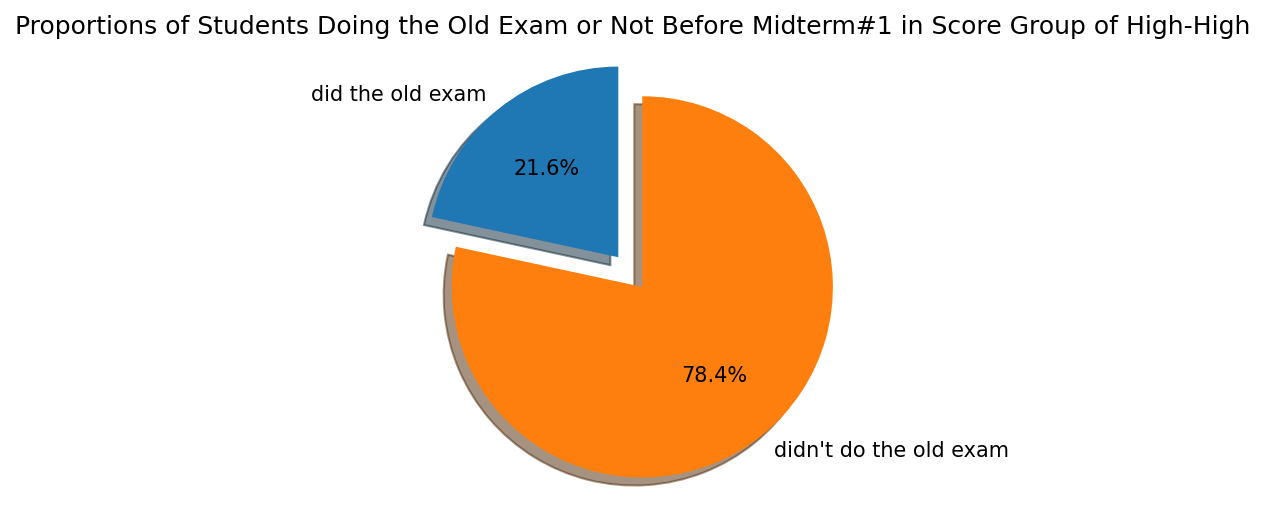

In [12]:
sizes = hh_old_exam_before_mid1["frequency"]
labels = hh_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of High-High")
plt.show()

### plot for high-low before mid1

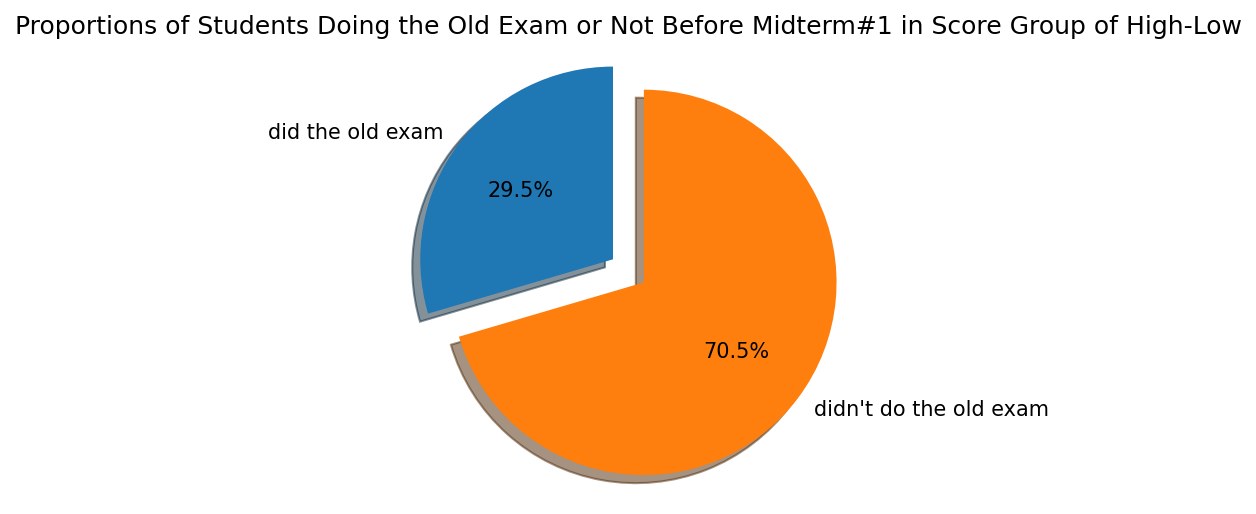

In [13]:
sizes = hl_old_exam_before_mid1["frequency"]
labels = hl_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of High-Low")
plt.show()

### plot for low-high before mid1

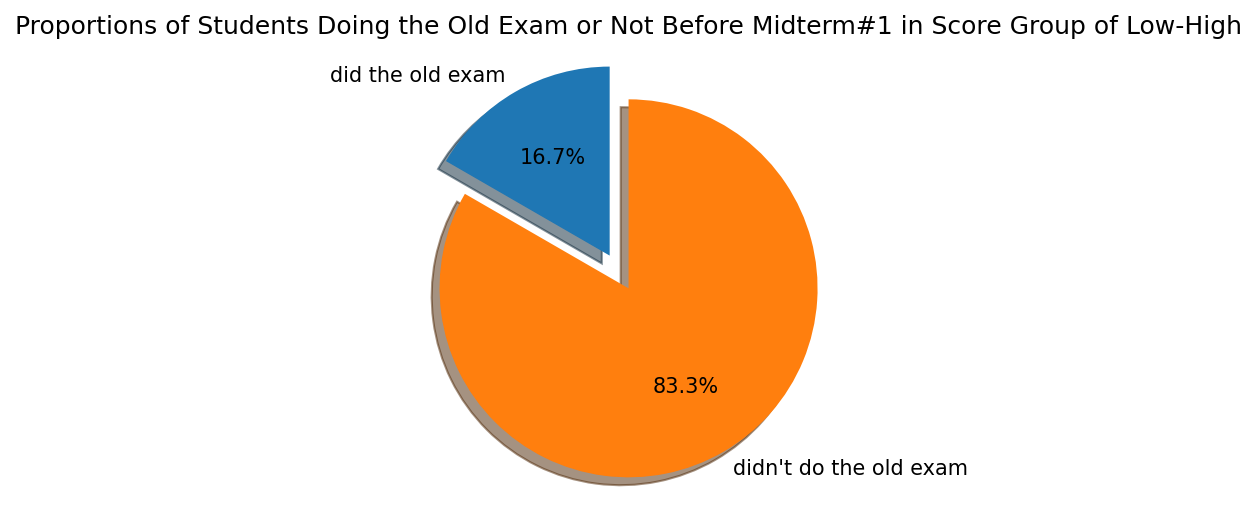

In [14]:
sizes = lh_old_exam_before_mid1["frequency"]
labels = lh_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of Low-High")
plt.show()

### plot for low-low before mid1

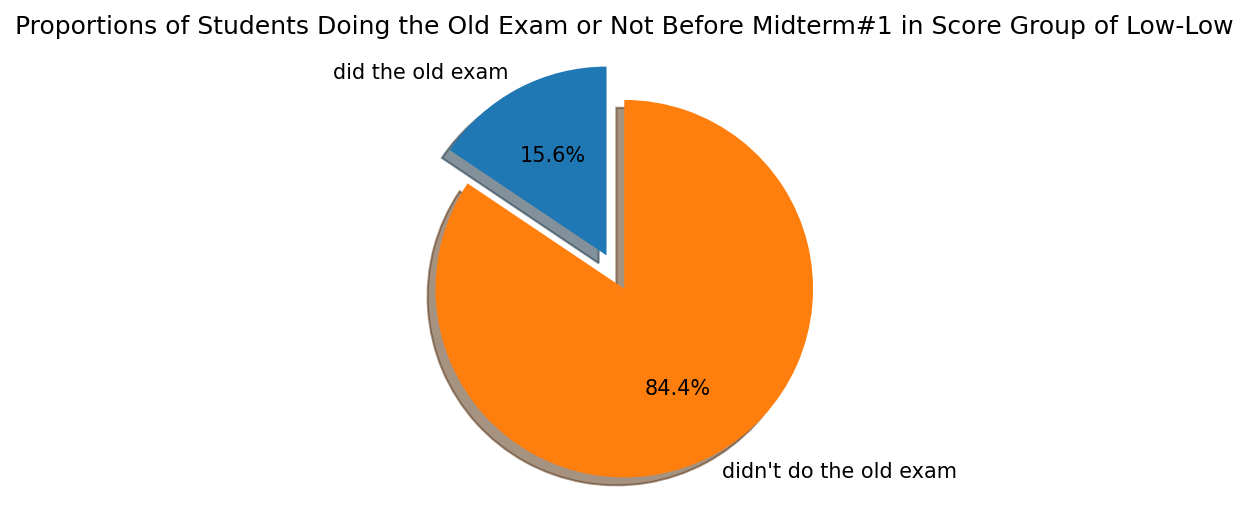

In [15]:
sizes = ll_old_exam_before_mid1["frequency"]
labels = ll_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of Low-Low")
plt.show()

### plot for high-high before mid2

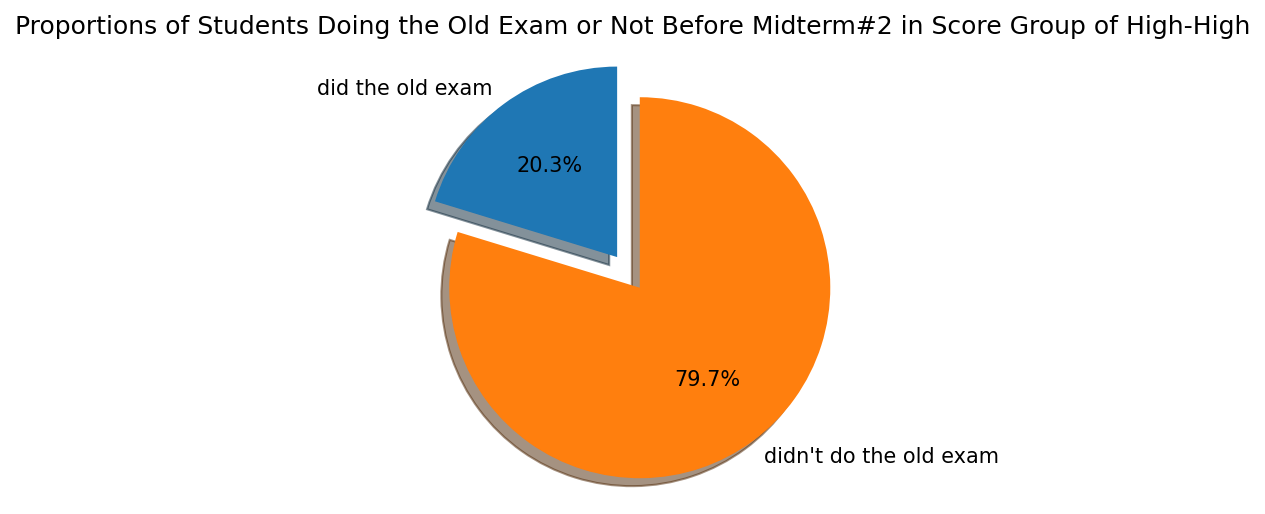

In [16]:
sizes = hh_old_exam_before_mid2["frequency"]
labels = hh_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of High-High")
plt.show()

### plot for high-low before mid2

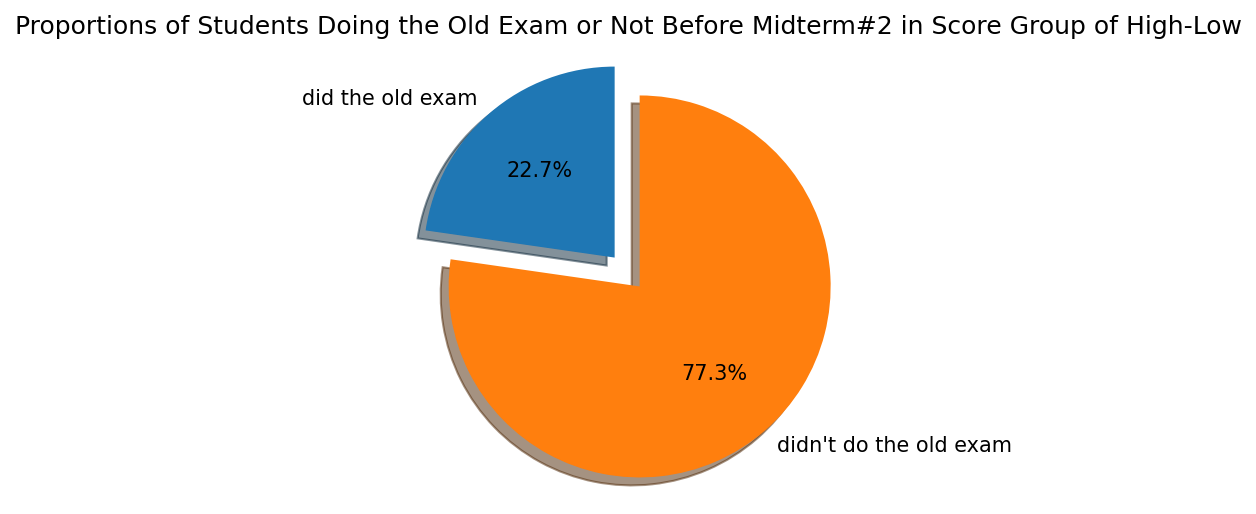

In [17]:
sizes = hl_old_exam_before_mid2["frequency"]
labels = hl_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of High-Low")
plt.show()

### plot for low-high before mid2

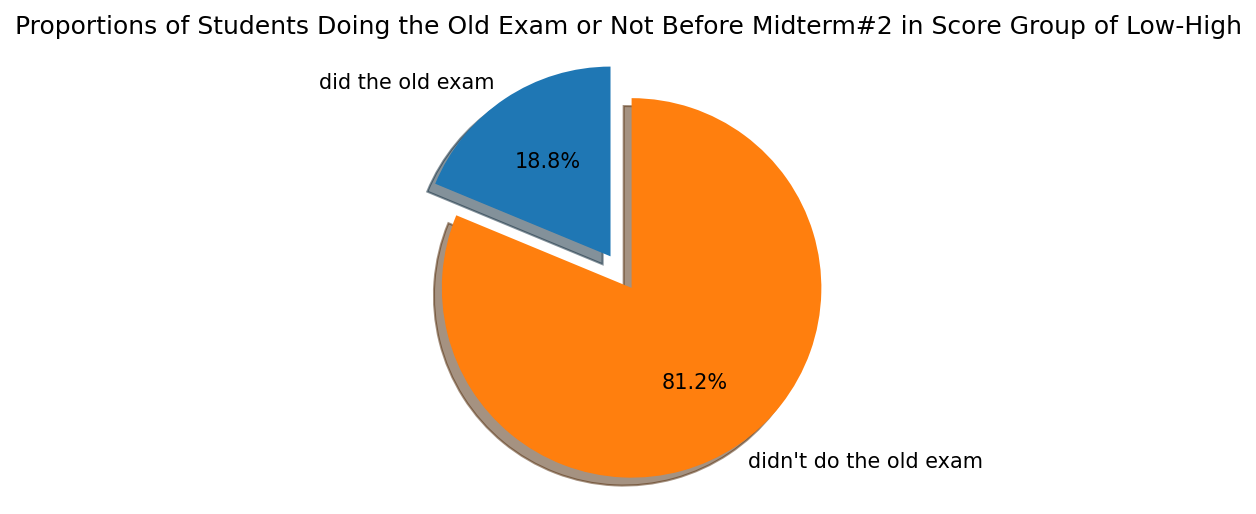

In [18]:
sizes = lh_old_exam_before_mid2["frequency"]
labels = lh_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of Low-High")
plt.show()

### plot for low-low before mid2

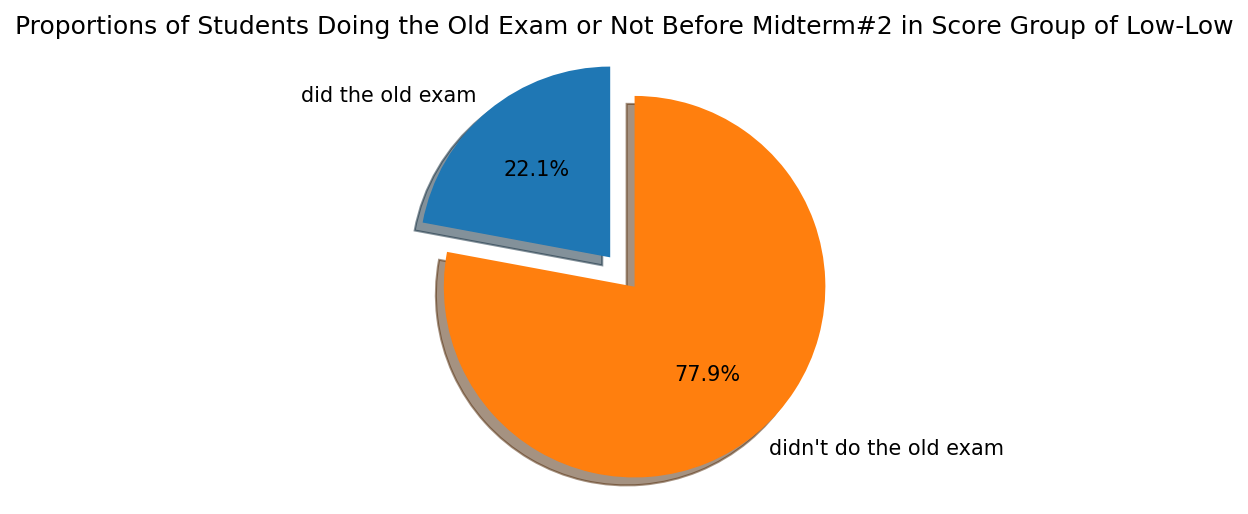

In [19]:
sizes = ll_old_exam_before_mid2["frequency"]
labels = ll_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of Low-Low")
plt.show()